Źródło danych:
https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer?resource=download

In [1]:
data_set = read.csv('survey lung cancer.csv')

In [2]:
library("psych")
library(repr)

In [3]:
data_set <- subset(data_set, LUNG_CANCER == "YES")
summary(data_set)

 GENDER       AGE           SMOKING      YELLOW_FINGERS     ANXIETY     
 F:125   Min.   :38.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 M:145   1st Qu.:58.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
         Median :62.50   Median :2.000   Median :2.000   Median :2.000  
         Mean   :62.95   Mean   :1.574   Mean   :1.604   Mean   :1.526  
         3rd Qu.:69.00   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
         Max.   :81.00   Max.   :2.000   Max.   :2.000   Max.   :2.000  
 PEER_PRESSURE   CHRONIC.DISEASE    FATIGUE       ALLERGY         WHEEZING    
 Min.   :1.000   Min.   :1.000   Min.   :1.0   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.0   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :2.000   Median :2.0   Median :2.000   Median :2.000  
 Mean   :1.537   Mean   :1.526   Mean   :1.7   Mean   :1.619   Mean   :1.604  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.0   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000 

**Średnia arytmetyczna**

In [4]:
tapply(data_set$AGE, data_set$GENDER, mean)

F        M 
62.78400 63.09655

In [5]:
mean(data_set$AGE)

[1] 62.95185

**Średnia harmoniczna**

In [6]:
tapply(data_set$AGE, data_set$GENDER, harmonic.mean)

F        M 
61.58303 62.17388

In [7]:
harmonic.mean(data_set$AGE)

[1] 61.89894

**Średnia geometryczna**

In [8]:
tapply(data_set$AGE, data_set$GENDER, geometric.mean)

F        M 
62.19205 62.64459

In [9]:
geometric.mean(data_set$AGE)

[1] 62.43468

**Średnia ucinana**

In [10]:
su <- function(X, k=50) {
  P <- sort(X)
  return(1 / (length(P) - 2 * k) * sum(P[(k + 1):(length(P) - k)]))
}

In [11]:
tapply(data_set$AGE, data_set$GENDER, su)

F        M 
62.12000 62.82222

In [12]:
su(data_set$AGE)

[1] 62.88235

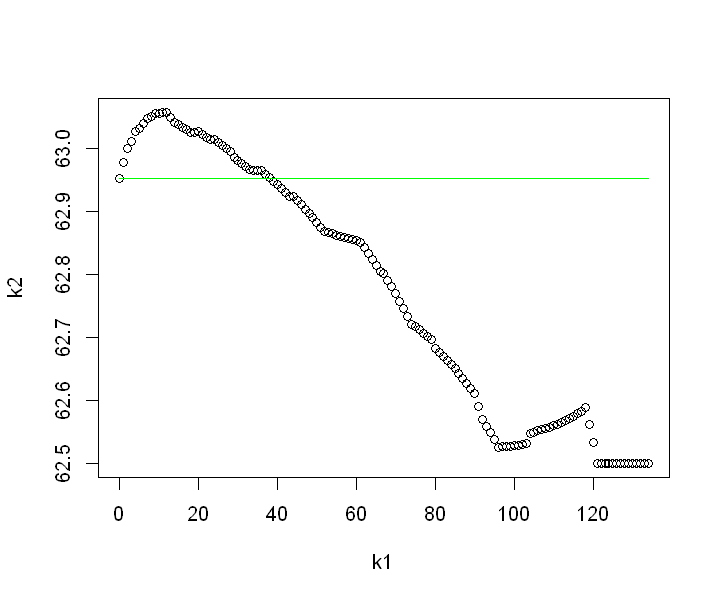

In [13]:
k1 <- seq(0, length(data_set$AGE) / 2 - 1, 1)
k2 <- numeric()
for(t in 1:length(k1)) {
  k2[t] <- su(data_set$AGE, k1[t])
}
options(repr.plot.width = 6, repr.plot.height = 5)
plot(k1, k2)
lines(k1, rep(mean(data_set$AGE), length(k1)), col = "green")

**Średnia windsorowska**

In [14]:
sw <- function(X, k=50) {
  P <- sort(X)
  return(1 / length(P) * ((k + 1) * P[k + 1] + sum(P[(k + 2):(length(P) - k - 1)]) + (k + 1) * P[length(P) - k]))
}

In [15]:
tapply(data_set$AGE, data_set$GENDER, sw)

F        M 
62.42400 62.94483

In [16]:
sw(data_set$AGE)

[1] 63.11111

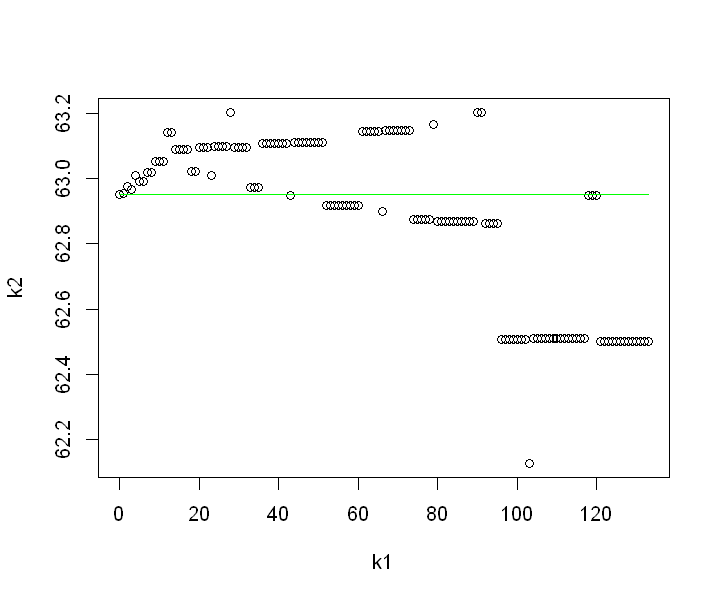

In [17]:
k1 <- seq(0, length(data_set$AGE) / 2 - 2, 1)
k2 <- numeric()
for(t in 1:length(k1)) {
  k2[t] <- sw(data_set$AGE, k1[t])
}
plot(k1, k2)
lines(k1, rep(mean(data_set$AGE), length(k1)), col = "green")

**Mediana**

In [18]:
tapply(data_set$AGE, data_set$GENDER, median)

F  M 
62 63

In [19]:
median(data_set$AGE)

[1] 62.5

**Histogram**

In [20]:
jpeg("hist_base.jpg", width = 600, height = 500)
hist(data_set$AGE,
    breaks = seq(min(data_set$AGE), max(data_set$AGE),
    length.out = round(5 * log(length(data_set$AGE)))),
    col = "lightpink", xlab = "WIEK", ylab = "",
    main = "Histogram liczebności")
dev.off()

png 
  2

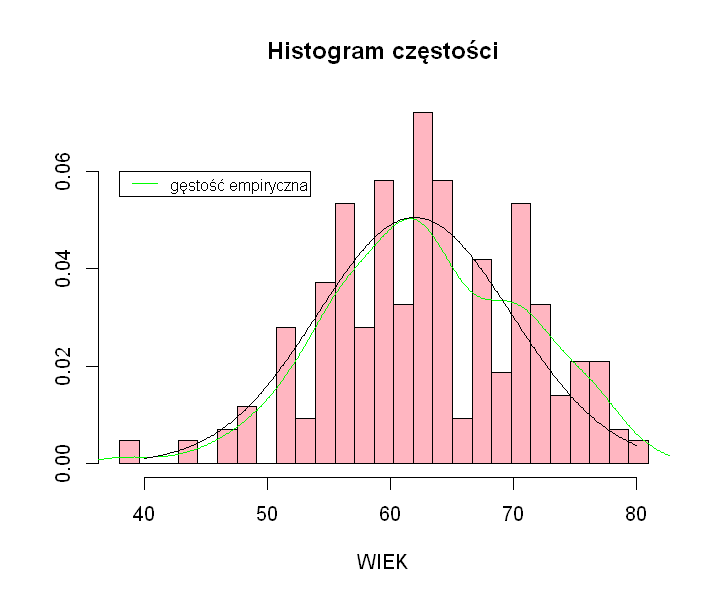

In [22]:
jpeg("hist_base_den.jpg", width = 600, height = 500)
hist(data_set$AGE,
    breaks = seq(min(data_set$AGE), max(data_set$AGE),
    length.out = round(5 * log(length(data_set$AGE)))),
    col = "lightpink", freq = FALSE, xlab = "WIEK", ylab = "",
    main = "Histogram częstości")
f <- density(data_set$AGE)
lines(f$x, f$y, col = "green")
legend(38, 0.06, legend = "gęstość empiryczna", col = "green", lty = 1,
    cex = 0.8)
x <- seq(40,80,0.1)
lines(x, dnorm(x, mean=62, sd=7.9))
dev.off()

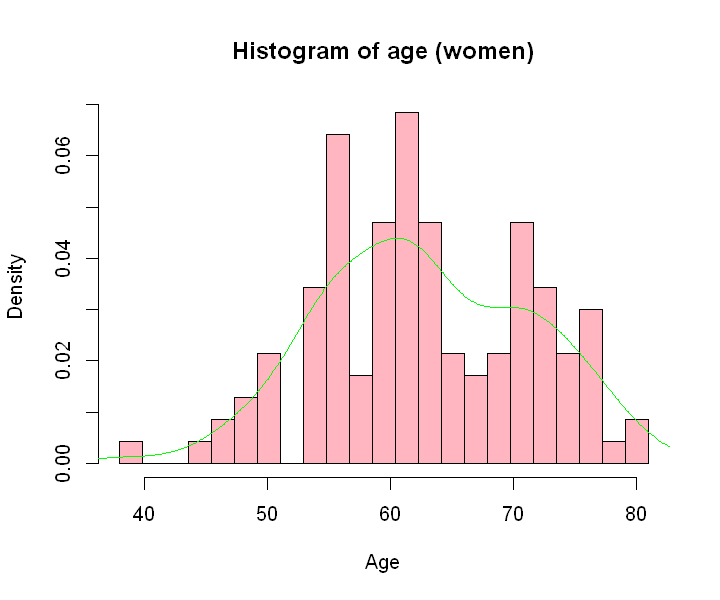

In [23]:
women <- subset(data_set, GENDER == "F")
hist(women$AGE,
    breaks = seq(min(women$AGE), max(women$AGE),
    length.out = round(5 * log(length(women$AGE)))),
    col = "lightpink", freq = FALSE, xlab = "Age",
    main = "Histogram of age (women)")
f <- density(women$AGE)
lines(f$x, f$y, col = "green")
legend(20, 0.06, legend = "density", col = "green", lty = 1, cex = 0.8)

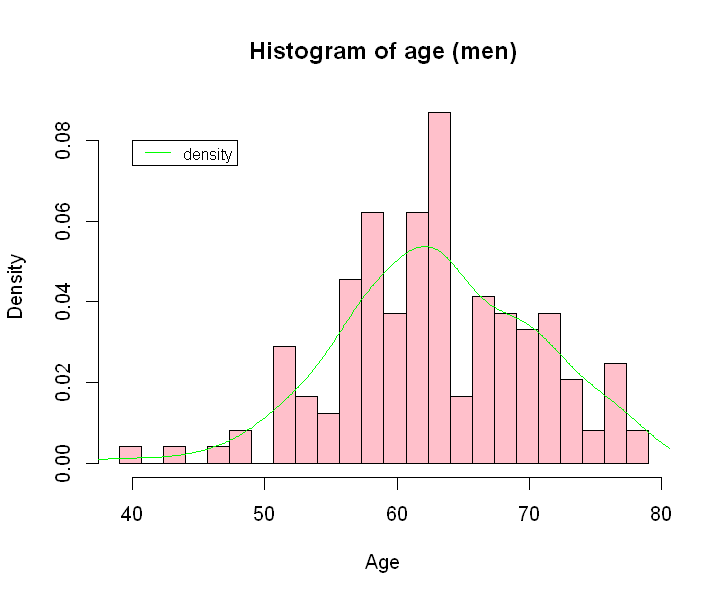

In [24]:
men <- subset(data_set, GENDER == "M")
hist(men$AGE, breaks = seq(min(men$AGE), max(men$AGE),
    length.out = round(5 * log(length(men$AGE)))),
    col = "pink", freq = FALSE, xlab = "Age", main = "Histogram of age (men)")
f <- density(men$AGE)
lines(f$x, f$y, col = "green")
legend(40, 0.08, legend = "density", col = "green", lty = 1, cex = 0.8)

Boxplot

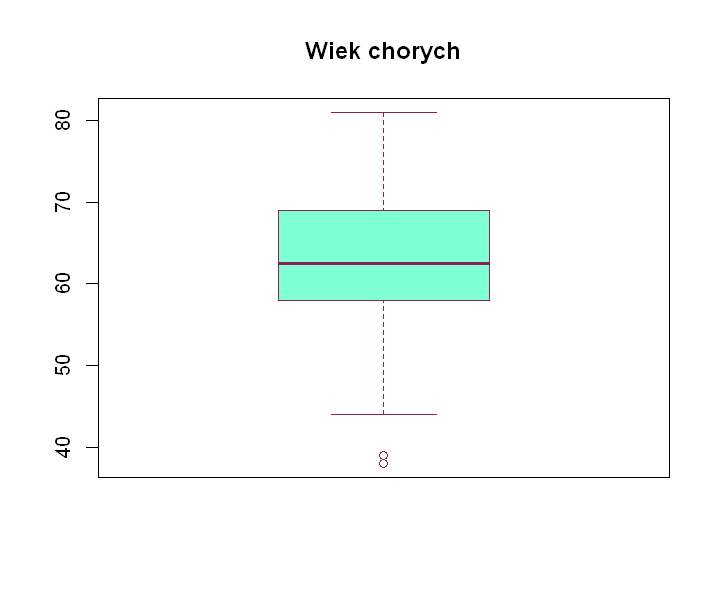

In [25]:
jpeg("boxplot_base.jpg", width = 600, height = 500)
options(repr.plot.width = 6, repr.plot.height = 5)
boxplot(data_set$AGE, col = "aquamarine", border = "violetred4",
    main = "Wiek chorych")
dev.off()

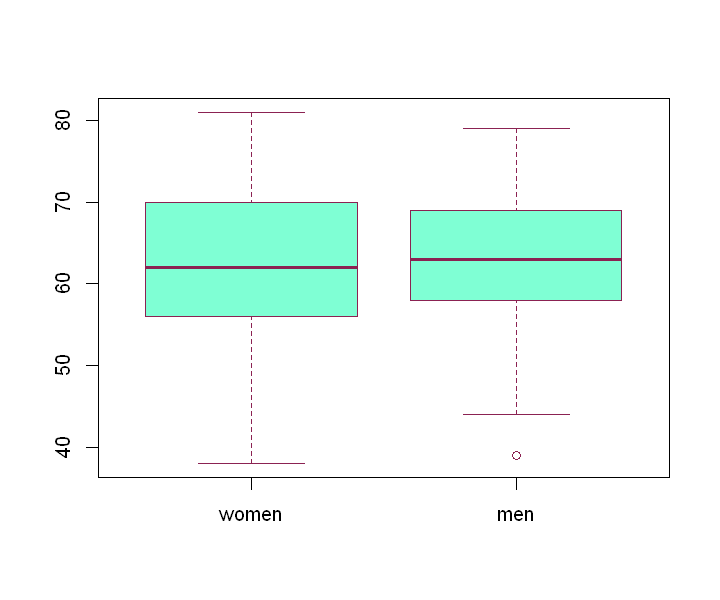

In [26]:
boxplot(women$AGE, men$AGE, col = "aquamarine",
    border = "violetred4", names = c("women", "men"))
k <- seq(0, 5, 0.1)

In [27]:
sm_women <- subset(women, SMOKING > 1)
non_sm_women <- subset(women, SMOKING < 2)
sm_men <- subset(men, SMOKING > 1)
non_sm_men <- subset(men, SMOKING < 2)

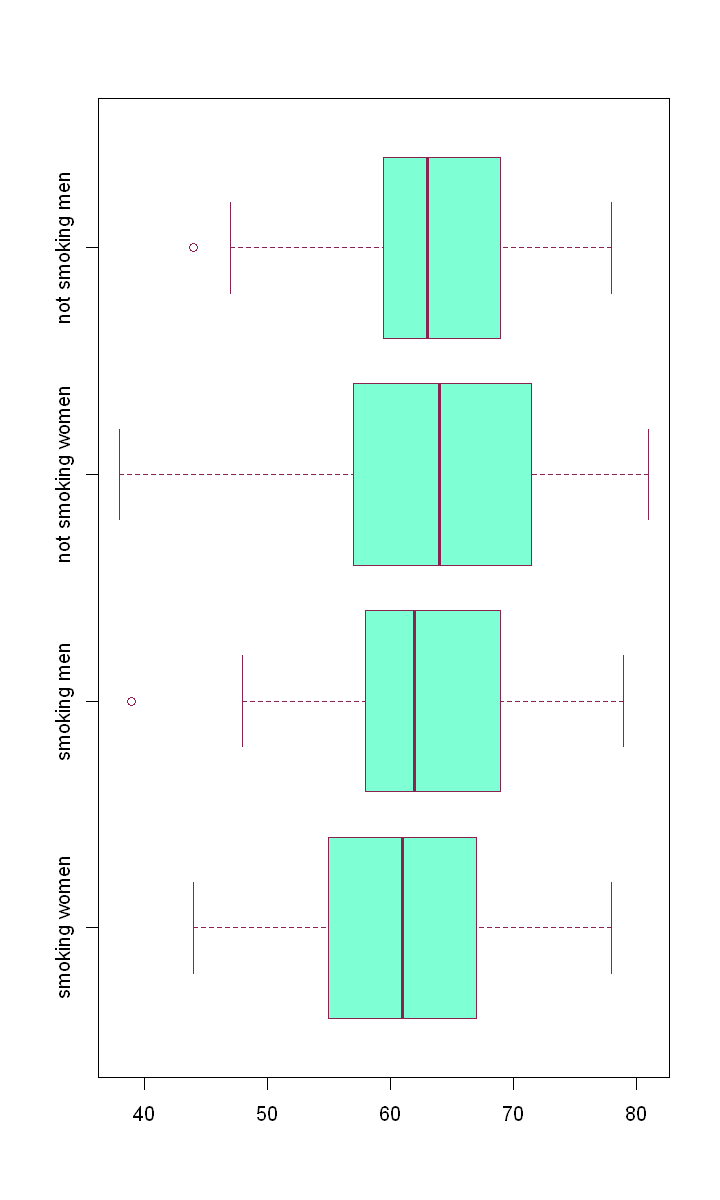

In [28]:
jpeg("boxplot_gender_smoking.jpg", width = 600, height = 800)
options(repr.plot.width = 6, repr.plot.height = 10)
boxplot(sm_women$AGE, sm_men$AGE, non_sm_women$AGE, non_sm_men$AGE,
    horizontal = TRUE, col = "aquamarine", border = "violetred4",
    names=c("smoking women", "smoking men",
        "not smoking women", "not smoking men"))
dev.off()

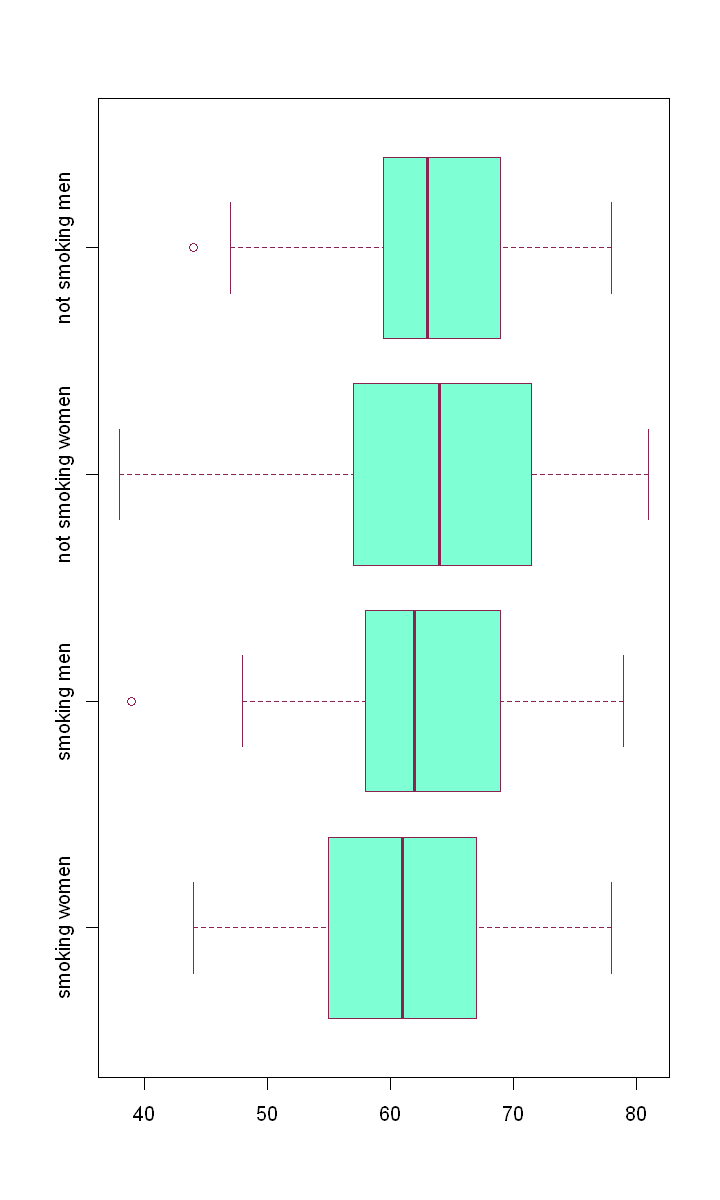

In [29]:
options(repr.plot.width = 6, repr.plot.height = 10)
boxplot(sm_women$AGE, sm_men$AGE, non_sm_women$AGE, non_sm_men$AGE,
    horizontal = TRUE, col = "aquamarine", border = "violetred4",
    names=c("smoking women", "smoking men",
        "not smoking women", "not smoking men"))

Dystrybuanta empiryczna

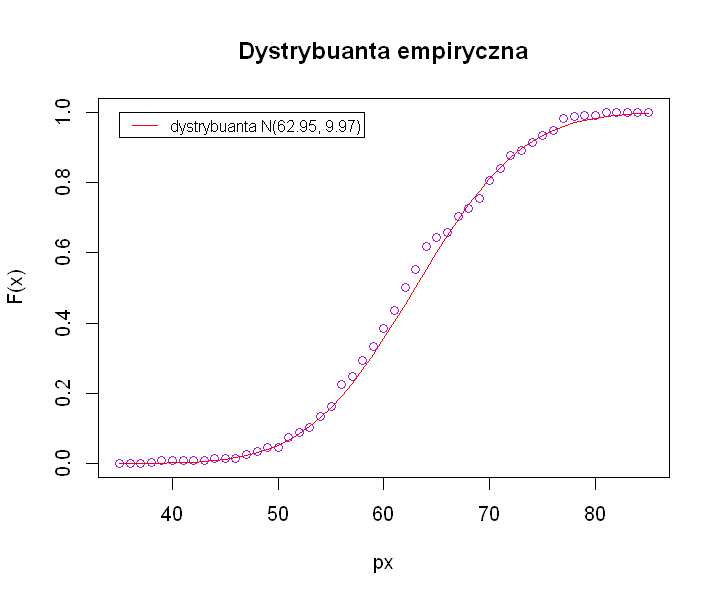

In [31]:
options(repr.plot.width = 6, repr.plot.height = 5)
F <- ecdf(data_set$AGE)
px <- seq(35, 85)
jpeg("dystr_norm.jpg", width = 600, height = 500)
plot(px, F(px), ylab = "F(x)", col = "purple",
    main = "Dystrybuanta empiryczna")
lines(px, pnorm(px, mean=62.95, sd=7.97), col = "red")
legend(35, 1, legend = "dystrybuanta N(62.95, 9.97)", col = "red", lty = 1,
    cex = 0.8)
dev.off()

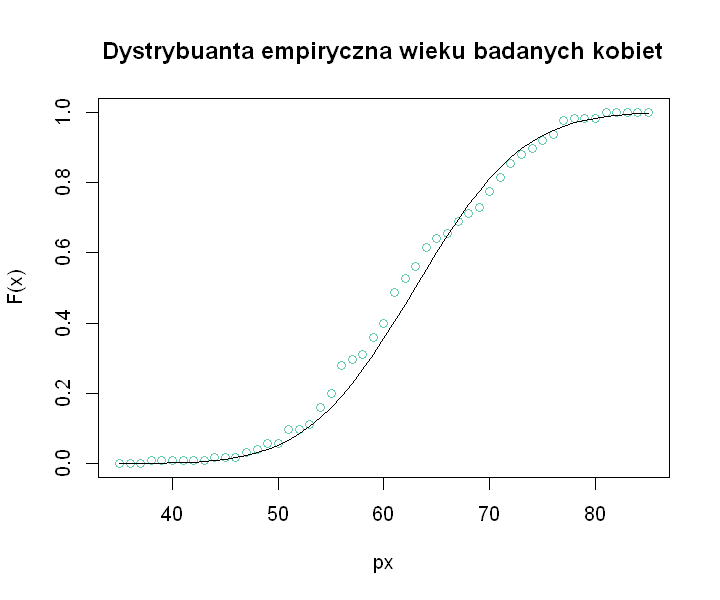

In [35]:
F1 <- ecdf(women$AGE)
plot(px, F1(px), col = "aquamarine3", ylab = "F(x)",
    main = "Dystrybuanta empiryczna wieku badanych kobiet")
lines(px, pnorm(px, mean=62.95, sd=7.97))

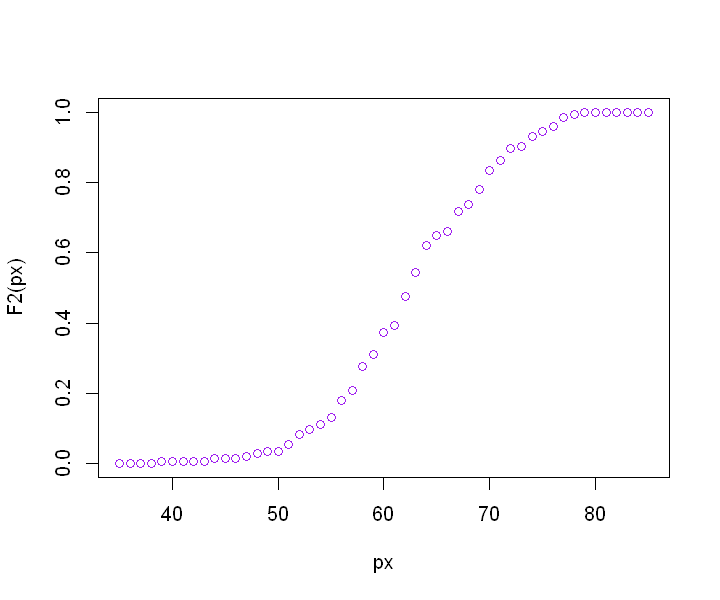

In [36]:
F2 <- ecdf(men$AGE)
plot(px, F2(px), col = "purple")

In [37]:
tapply(data_set$AGE, data_set$SMOKING, mean)
table(data_set$SMOKING)

1        2 
63.77391 62.34194


  1   2 
115 155 

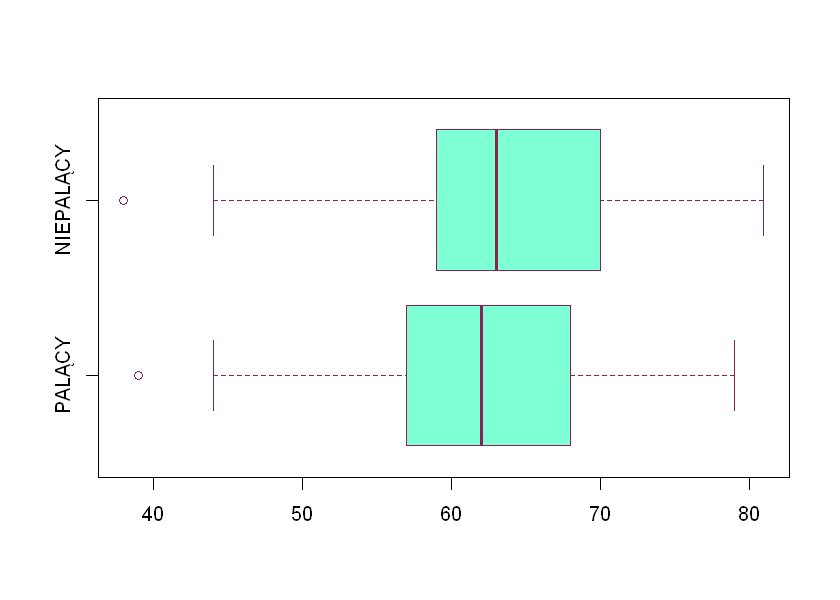

In [38]:
smoke <- subset(data_set, SMOKING > 1)
non_smoke <- subset(data_set, SMOKING < 2)
jpeg("boxplot_smoking.jpg", width = 600, height = 600)
options(repr.plot.width = 7, repr.plot.height = 5)
boxplot(smoke$AGE, non_smoke$AGE, horizontal = TRUE, col = "aquamarine",
    border = "violetred4", names = c("PALĄCY", "NIEPALĄCY"))
dev.off()

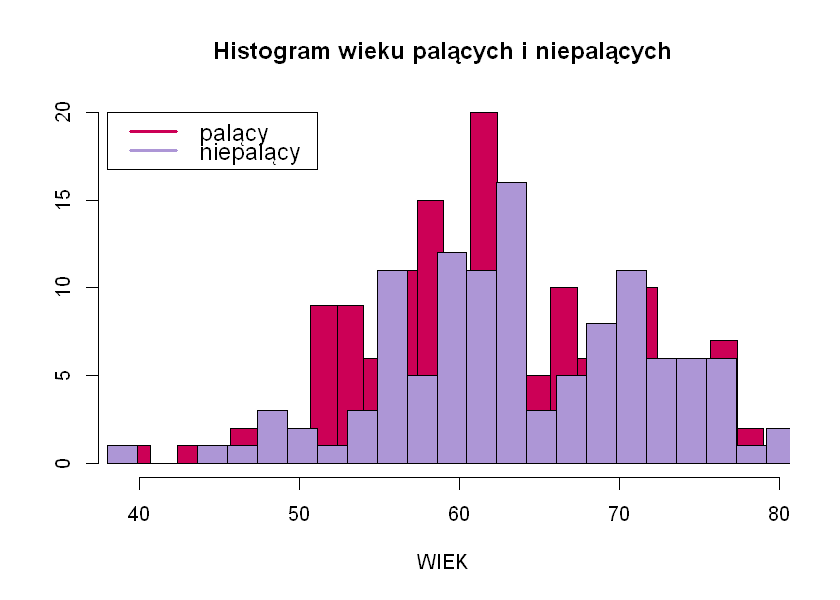

In [39]:
c1 <- rgb(204, 0, 86, max = 255, names = "lt.red")
c2 <- rgb(173, 150, 214, max = 255, names = "lt.green")
jpeg("hist_smoking.jpg", width = 800, height = 600)
h1 <- hist(smoke$AGE, breaks = seq(min(smoke$AGE), max(smoke$AGE),
    length.out = round(5 * log(length(smoke$AGE)))), plot = FALSE)
h2 <- hist(non_smoke$AGE, breaks = seq(min(non_smoke$AGE), max(non_smoke$AGE),
    length.out = round(5 * log(length(non_smoke$AGE)))), plot = FALSE)

plot(h1, col = c1, main = "Histogram wieku palących i niepalących",
    xlab = "WIEK", ylab = "")
plot(h2, col = c2, add = TRUE)
legend(38, 20, legend = c("palący", "niepalący"),
    col = c(c1, c2), lwd = 3, cex = 1.2)
dev.off()

In [40]:
subset(data_set, AGE < 42)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
239,F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
262,M,39,2,1,1,2,1,2,2,2,2,1,2,1,2,YES


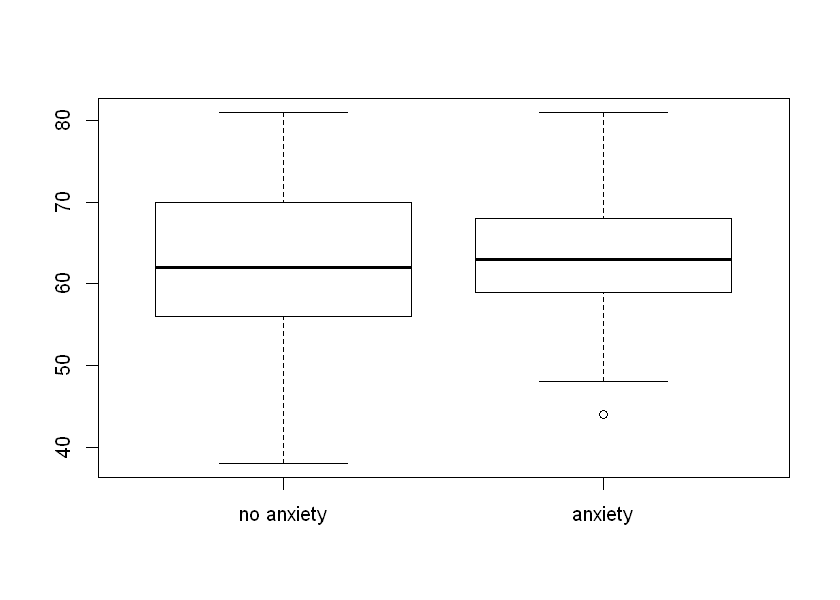

In [41]:
anx <- subset(data_set, ANXIETY > 1)
no_anx <- subset(data_set, ANXIETY < 2)
boxplot(no_anx$AGE, anx$AGE, names = c("no anxiety", "anxiety"))

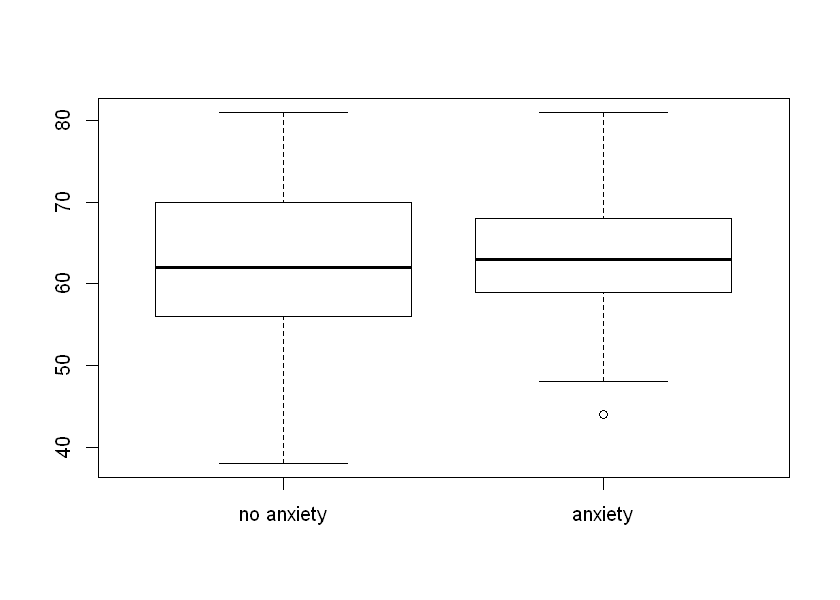

In [42]:
anx <- subset(data_set, ANXIETY > 1)
no_anx <- subset(data_set, ANXIETY < 2)
boxplot(no_anx$AGE, anx$AGE, names = c("no anxiety", "anxiety"))